🛒 Walmart Weekly Sales Forecasting Project

📌 Problem Statement

Walmart aims to enhance inventory management and operational efficiency by forecasting weekly sales across its retail stores in the U.S.
This project focuses on Store 1, utilizing time series forecasting techniques to predict future sales trends.

🎯 Objective

📊 EDA (Exploratory Data Analysis)
Identify patterns, trends, outliers, and seasonal behavior in weekly sales data.

🌦️ External Factors Analysis

Evaluate how variables like Unemployment, CPI (Consumer Price Index), and Temperature affect sales performance.

🔍 Model Building:

Store 1 FocusBuild and evaluate time series forecasting models such as:

ARIMA

SARIMA

Facebook Prophet

📈 Forecasting Goal

Predict the next 12 weeks of sales for Store 1.

📏 Performance Metrics

Measure model accuracy using:

RMSE (Root Mean Squared Error)


⚖️ Model Comparison

Compare ARIMA, SARIMA, and Prophet models, then select the best-performing one based on accuracy and scalability.


In [378]:
#Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [379]:
#load data
df =pd.read_csv("/content/Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [380]:
#Shape
df.shape

(6435, 8)

In [381]:
#top 5 rows
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [382]:
#bottom 5 rows
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [383]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [384]:
#Statistical summary
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [385]:
#Change dtype of date column
df['Date']=pd.to_datetime(df["Date"],format="%d-%m-%Y",errors="coerce")

In [386]:
#After change dtype agian check
df.dtypes

,0
Store,int64
Date,datetime64[ns]
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


In [387]:
#Missing value
df.isnull().sum()/len(df)*100

,0
Store,0.0
Date,0.0
Weekly_Sales,0.0
Holiday_Flag,0.0
Temperature,0.0
Fuel_Price,0.0
CPI,0.0
Unemployment,0.0


#There is no missing value

In [388]:
#Check for duplicate
df.duplicated().sum()

np.int64(0)

#There is no duplicate in this

In [389]:
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [390]:
#Sort row Datewise
df.sort_values("Date",inplace=True)

In [391]:
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324


In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 452.5 KB


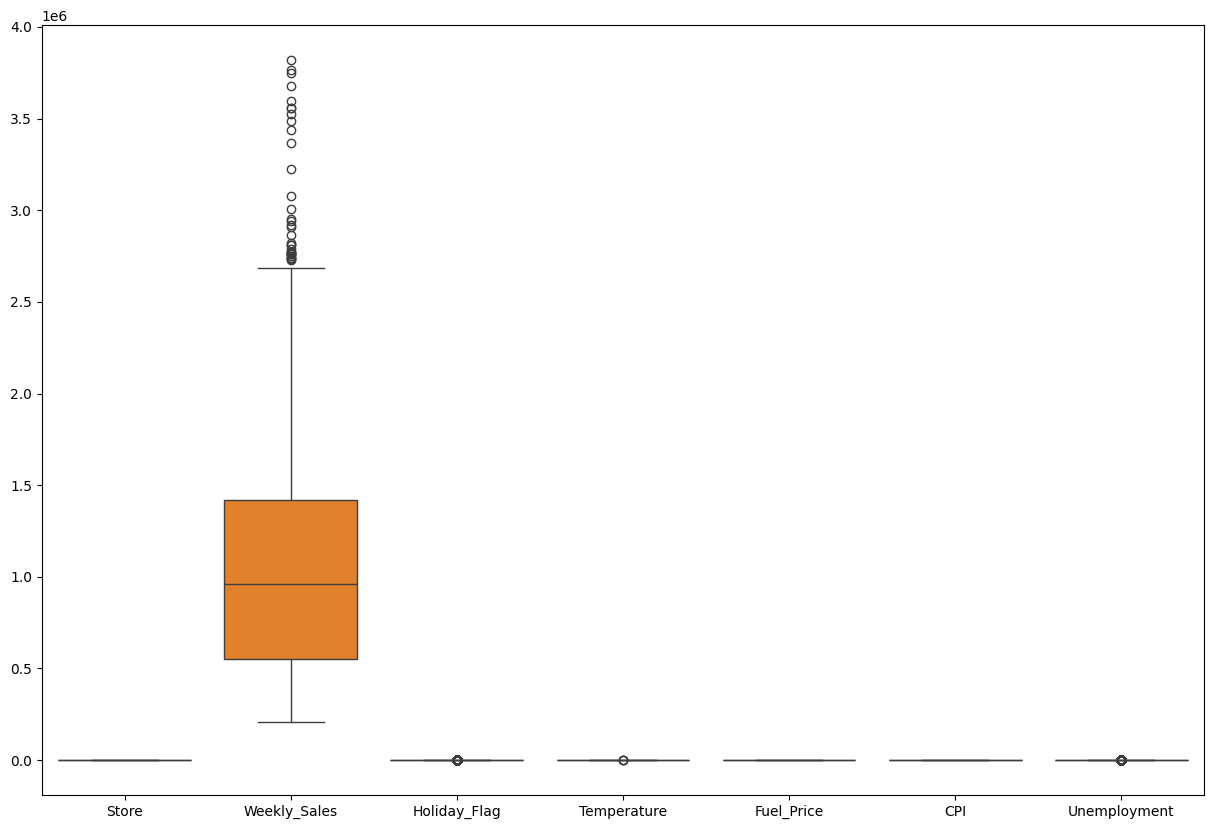

In [393]:
#check outlier
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

#in Weekly sales column have outlier

In [394]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [427]:
#Removing outlier
for col in df.columns:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  upper=Q3+1.5*IQR
  lower=Q1-1.5*IQR
  df=df[(df[col]>=lower)& (df[col]<=upper)]

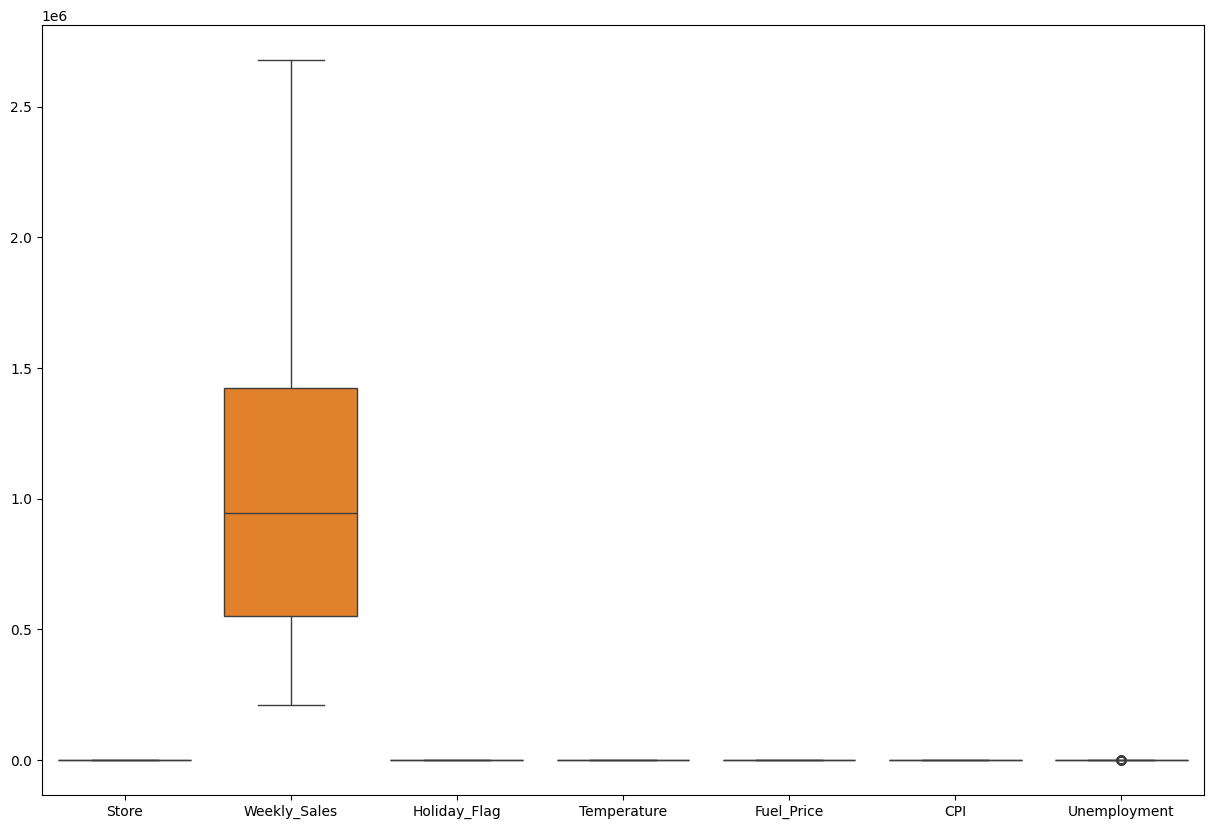

In [396]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

#Here we see that there is no outlier present here


#EDA
#Are sales affected by unemployment?

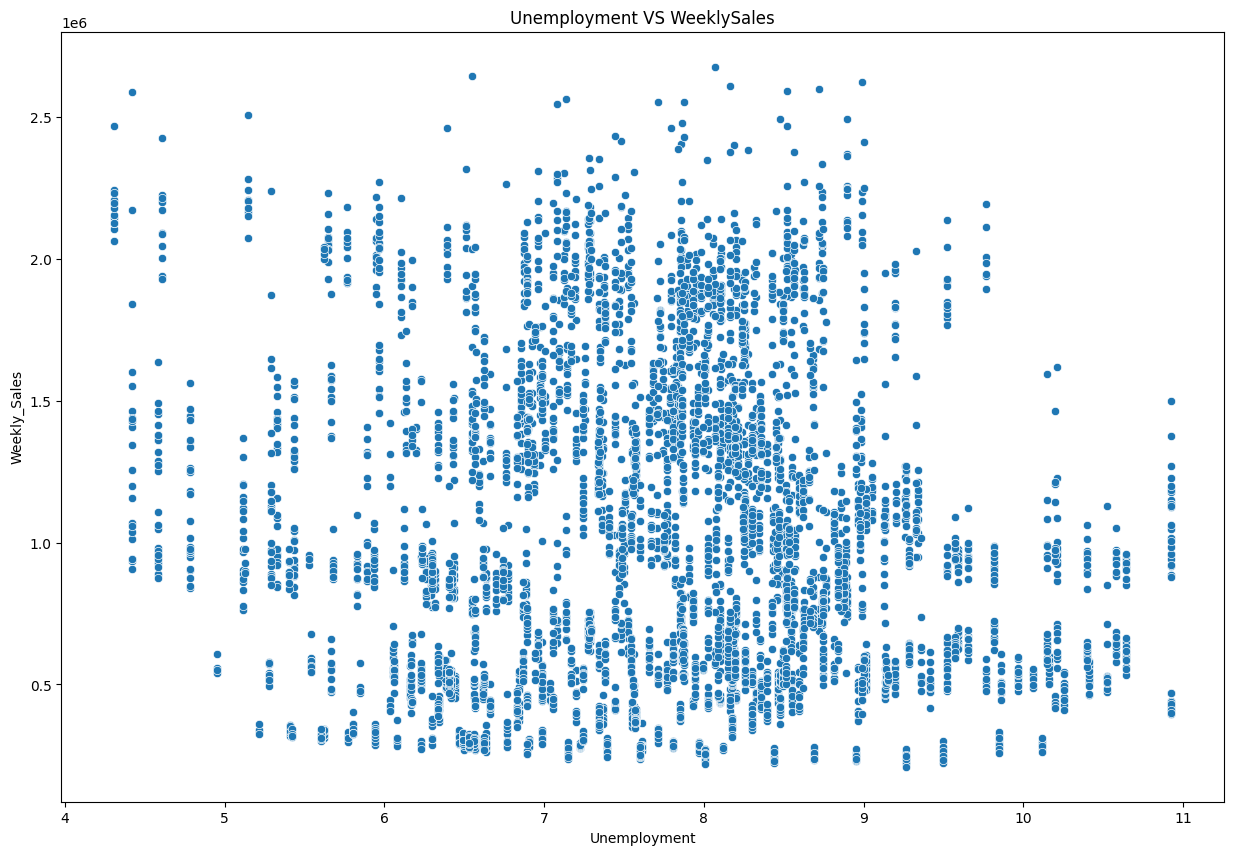

In [397]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Unemployment",y="Weekly_Sales",data=df)
plt.title("Unemployment VS WeeklySales")
plt.show()

### 📉 Unemployment vs Weekly Sales – Insight

- There is no strong linear correlation between unemployment and weekly sales.
- Moderate unemployment (6%–9%) seems to support steady sales performance.
- Extremely high unemployment areas (above 10%) show more volatility and scattered sales.


In [398]:
#Stores most affected by Unemployment
unemp_impact = df.groupby('Store')[['Unemployment', 'Weekly_Sales']].corr().iloc[0::2,-1]
unemp_impact = unemp_impact.sort_values()
print("Top 5 stores negatively affected by Unemployment:")
print(unemp_impact.head())


Top 5 stores negatively affected by Unemployment:
Store              
44     Unemployment   -0.801376
4      Unemployment   -0.658851
39     Unemployment   -0.427695
13     Unemployment   -0.384296
41     Unemployment   -0.382718
Name: Weekly_Sales, dtype: float64


Unemployment has a strong negative correlation with weekly sales in Stores 44, 4, and 39, indicating that higher unemployment leads to lower sales. These stores are more sensitive to economic downturns and may require targeted support during such periods.





#Do Sales show a seasonal trend?

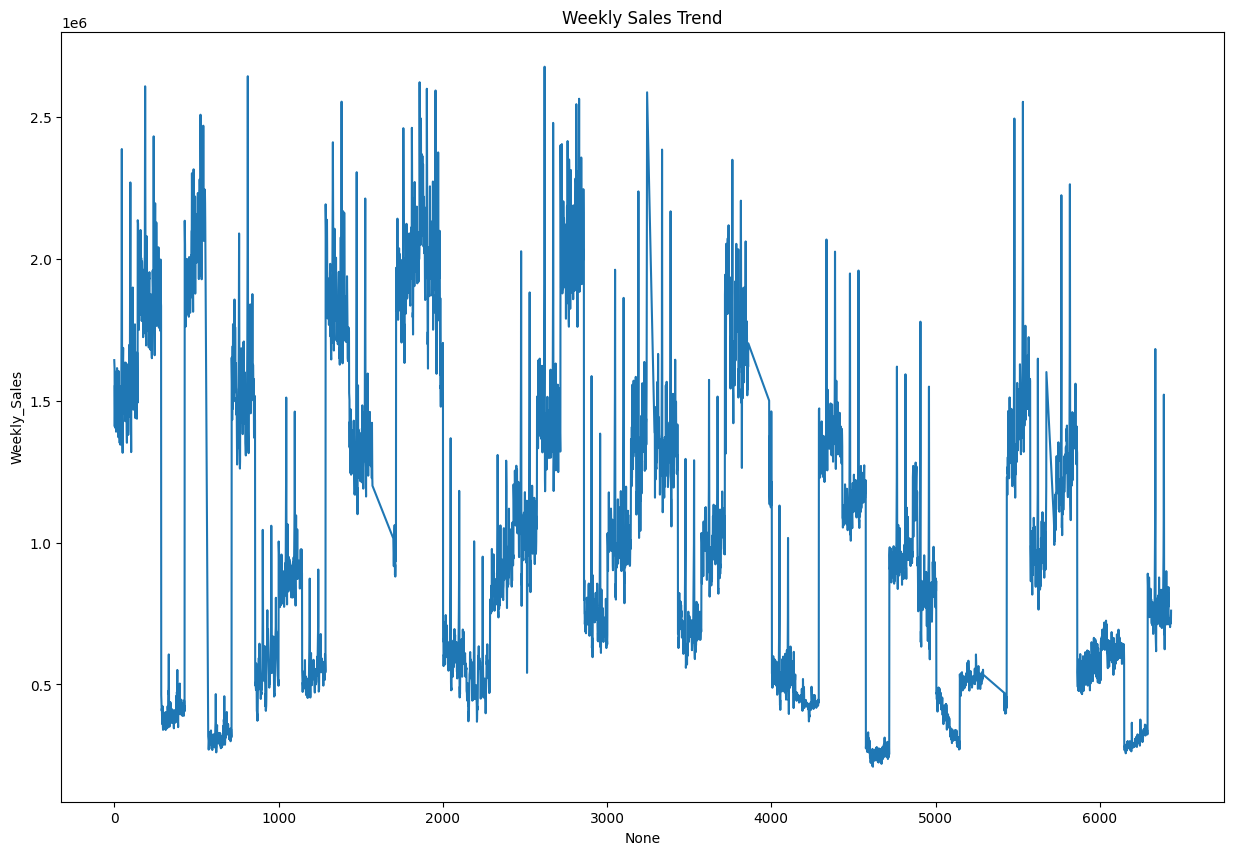

In [399]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df.index,y="Weekly_Sales",data=df)
plt.title("Weekly Sales Trend")
plt.show()

The weekly sales show strong seasonality with sharp peaks during holidays and dips in off-seasons. This cyclical pattern indicates that time series models like Prophet or SARIMA are suitable for forecasting.

# Does Temperature Affect Sales?

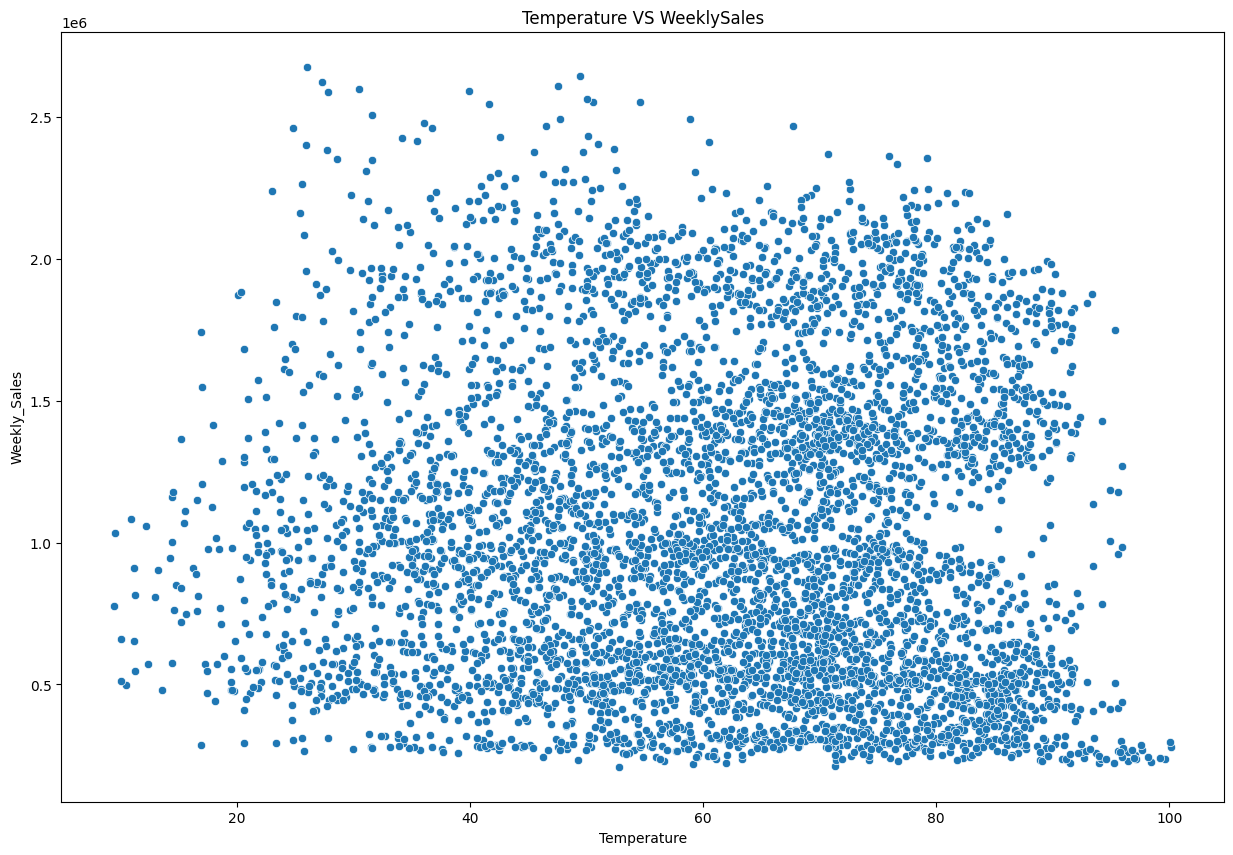

In [400]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Temperature",y="Weekly_Sales",data=df)
plt.title("Temperature VS WeeklySales")
plt.show()

There is no clear linear relationship between temperature and weekly sales—sales remain spread across all temperature ranges. This suggests temperature has minimal or inconsistent impact on overall sales trends.


#CPI VS Weekly Sales

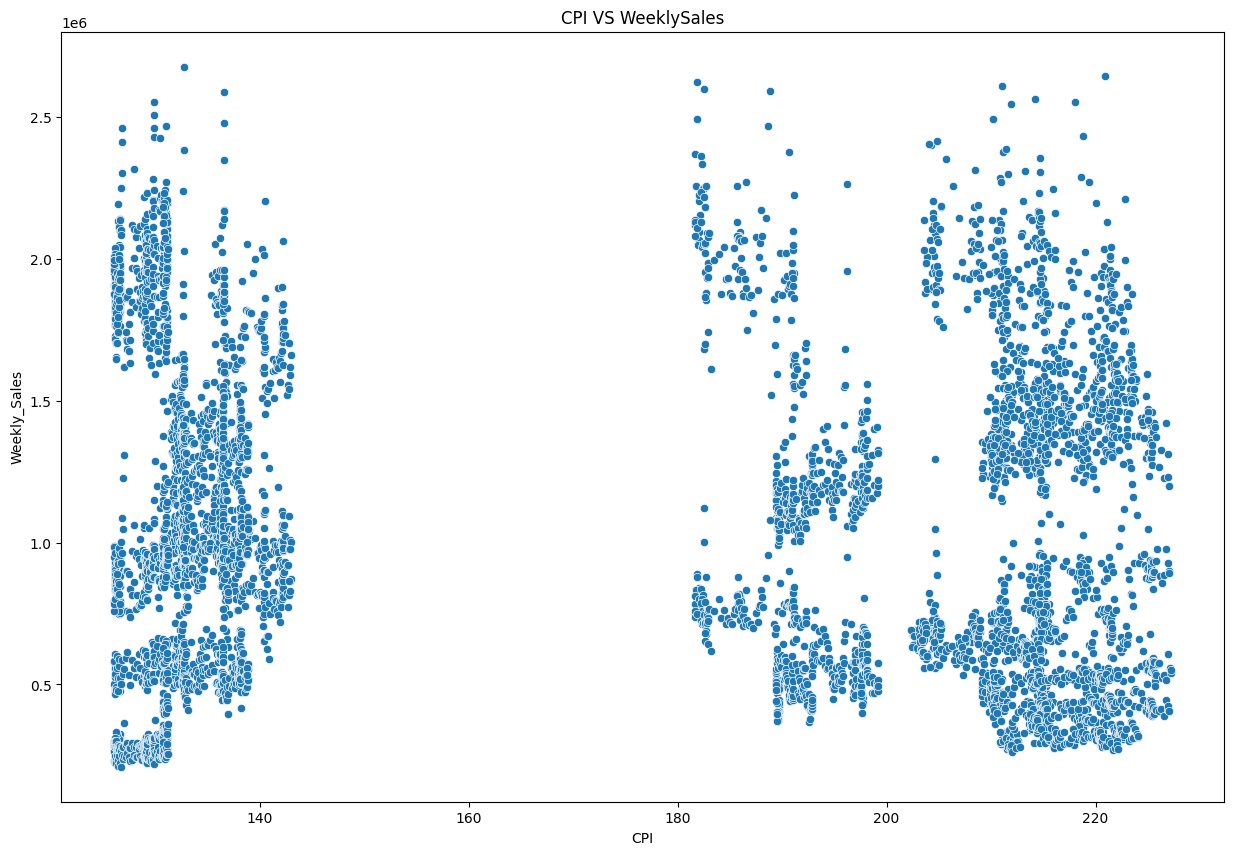

In [401]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="CPI",y="Weekly_Sales",data=df)
plt.title("CPI VS WeeklySales")
plt.show()

Weekly sales show no consistent trend with CPI changes—sales remain scattered across different CPI levels. This indicates that CPI has limited direct influence on Walmart’s weekly sales patterns.


#Top and Bottom performing Stores

In [402]:
store_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

top_5 = store_sales.head()
bottom_5 = store_sales.tail()

print("Top 5 Stores:", top_5)
print("\nBottom 5 Stores:", bottom_5)

# Difference between best and worst
gap = top_5.iloc[0] - bottom_5.iloc[-1]
print(f"\nDifference between best and worst performing store: {gap:.2f}")

Top 5 Stores: Store
20    2.056650e+06
4     2.036610e+06
14    1.983411e+06
13    1.958935e+06
2     1.892591e+06
Name: Weekly_Sales, dtype: float64

Bottom 5 Stores: Store
3     400064.846391
36    373953.448647
5     314892.276917
44    303253.622782
33    259656.216316
Name: Weekly_Sales, dtype: float64

Difference between best and worst performing store: 1796994.18


# Month-wise trend

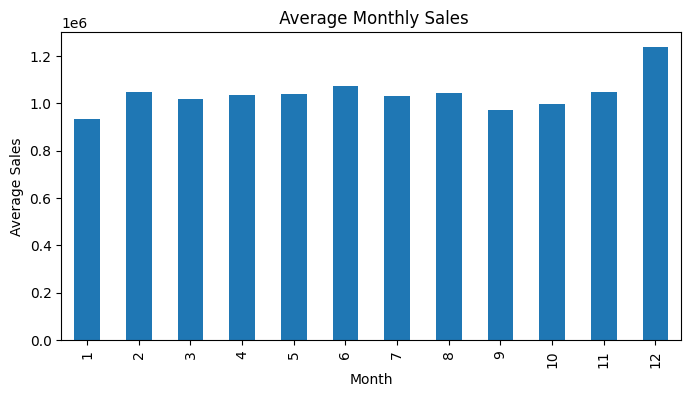

In [403]:
# Month-wise trend
df['Month'] = df['Date'].dt.month
df.groupby('Month')['Weekly_Sales'].mean().plot(kind='bar', figsize=(8,4))
plt.title(" Average Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()

### 📆 Monthly Sales Trend – Insight

- Clear **seasonality** is observed — **November and December** show higher average weekly sales.
- This indicates **holiday season spikes** due to events like Black Friday and Christmas.
- Mid-year months like April–July show lower average sales comparatively.


#Which Store has highest sales

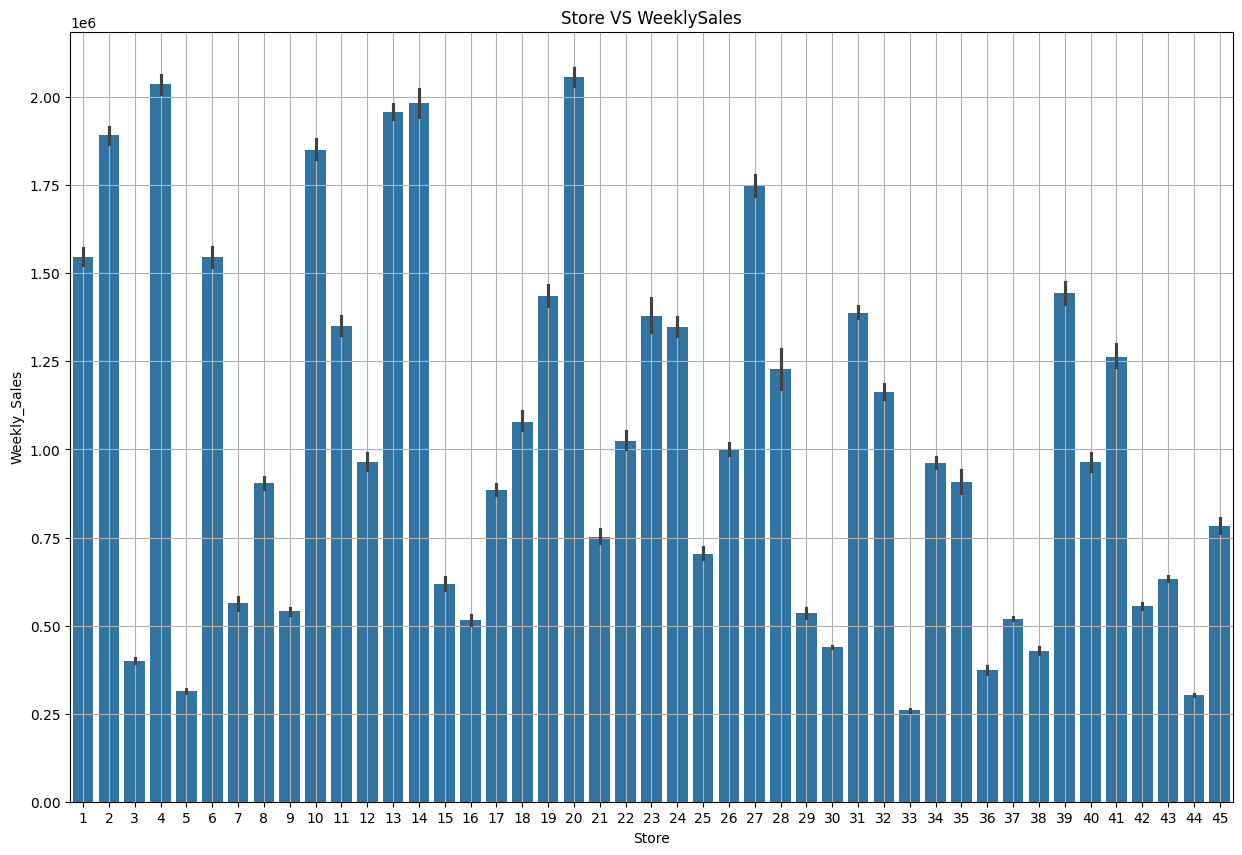

In [404]:
plt.figure(figsize=(15,10))
sns.barplot(x="Store",y="Weekly_Sales",data=df)
plt.title("Store VS WeeklySales")
plt.grid()
plt.show()

Stores 20, 4, 14, and 2 show the highest average weekly sales, making them top-performing stores.
Stores 5, 36, 33, and 30 have the lowest weekly sales, indicating potential underperformance.

In [405]:
!pip install prophet

In [406]:
from prophet import Prophet
#for one store
df_store1 = df[df['Store'] ==1 ][["Date",'Weekly_Sales']].copy()
df_store1.rename(columns={'Date':'ds','Weekly_Sales':'y'},inplace=True)
df_store1

,ds,y
0,2010-02-05,1643690.90
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
5,2010-03-12,1439541.59
...,...,...
138,2012-09-28,1437059.26
139,2012-10-05,1670785.97
140,2012-10-12,1573072.81
141,2012-10-19,1508068.77


In [407]:
model=Prophet()
model.fit(df_store1)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0shi3hle/xaqdm7ai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0shi3hle/70k7xdze.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38284', 'data', 'file=/tmp/tmp0shi3hle/xaqdm7ai.json', 'init=/tmp/tmp0shi3hle/70k7xdze.json', 'output', 'file=/tmp/tmp0shi3hle/prophet_modellw053xf5/prophet_model-20250719111852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:18:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:18:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [408]:
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,1.481642e+06,1.473735e+06,1.685811e+06,1.481642e+06,1.481642e+06,92121.290146,92121.290146,92121.290146,92121.290146,92121.290146,92121.290146,0.0,0.0,0.0,1.573763e+06
1,2010-02-19,1.483853e+06,1.490168e+06,1.695771e+06,1.483853e+06,1.483853e+06,107439.013405,107439.013405,107439.013405,107439.013405,107439.013405,107439.013405,0.0,0.0,0.0,1.591292e+06
2,2010-02-26,1.484959e+06,1.412860e+06,1.619415e+06,1.484959e+06,1.484959e+06,33284.621715,33284.621715,33284.621715,33284.621715,33284.621715,33284.621715,0.0,0.0,0.0,1.518243e+06
3,2010-03-05,1.486065e+06,1.372971e+06,1.584380e+06,1.486065e+06,1.486065e+06,-2305.014931,-2305.014931,-2305.014931,-2305.014931,-2305.014931,-2305.014931,0.0,0.0,0.0,1.483759e+06
4,2010-03-12,1.487170e+06,1.383743e+06,1.590968e+06,1.487170e+06,1.487170e+06,2333.070351,2333.070351,2333.070351,2333.070351,2333.070351,2333.070351,0.0,0.0,0.0,1.489503e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2012-12-16,1.646408e+06,2.014527e+06,2.219734e+06,1.646407e+06,1.646408e+06,469312.091261,469312.091261,469312.091261,469312.091261,469312.091261,469312.091261,0.0,0.0,0.0,2.115720e+06
141,2012-12-23,1.647511e+06,2.125936e+06,2.341391e+06,1.647510e+06,1.647512e+06,589016.511246,589016.511246,589016.511246,589016.511246,589016.511246,589016.511246,0.0,0.0,0.0,2.236527e+06
142,2012-12-30,1.648614e+06,1.972399e+06,2.184251e+06,1.648613e+06,1.648615e+06,428338.045198,428338.045198,428338.045198,428338.045198,428338.045198,428338.045198,0.0,0.0,0.0,2.076952e+06
143,2013-01-06,1.649718e+06,1.626400e+06,1.843856e+06,1.649717e+06,1.649719e+06,81297.124725,81297.124725,81297.124725,81297.124725,81297.124725,81297.124725,0.0,0.0,0.0,1.731015e+06


In [409]:
forecast[['ds','yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2010-02-05,1.573763e+06,1.685811e+06,1.473735e+06
1,2010-02-19,1.591292e+06,1.695771e+06,1.490168e+06
2,2010-02-26,1.518243e+06,1.619415e+06,1.412860e+06
3,2010-03-05,1.483759e+06,1.584380e+06,1.372971e+06
4,2010-03-12,1.489503e+06,1.590968e+06,1.383743e+06
...,...,...,...,...
140,2012-12-16,2.115720e+06,2.219734e+06,2.014527e+06
141,2012-12-23,2.236527e+06,2.341391e+06,2.125936e+06
142,2012-12-30,2.076952e+06,2.184251e+06,1.972399e+06
143,2013-01-06,1.731015e+06,1.843856e+06,1.626400e+06


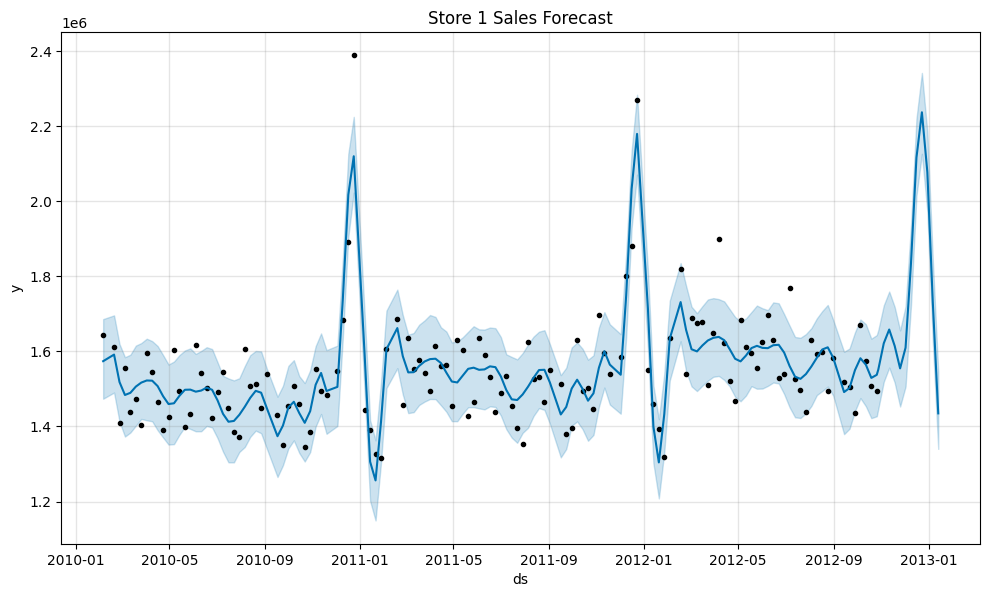

In [410]:
model.plot(forecast)
plt.title("Store 1 Sales Forecast")
plt.show()

In [411]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Set datetime index
df_actual = df_store1.set_index('ds').copy()
df_forecast = forecast.set_index('ds')[['yhat']]

# Align actuals and predictions
common_dates = df_actual.index.intersection(df_forecast.index)
y_true = df_actual.loc[common_dates]['y']
y_pred = df_forecast.loc[common_dates]['yhat']

#  Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f" Prophet RMSE: {rmse:,.2f}")



 Prophet RMSE: 81,990.52


#ARIMA

In [412]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

#Check Stationarity

In [413]:
# Fix for "['Date'] not in index" error
df_store1 = df[df['Store'] == 1].reset_index()[['Date', 'Weekly_Sales']].copy()

# Then reprocess
df_store1['Date'] = pd.to_datetime(df_store1['Date'])
df_store1 = df_store1.sort_values('Date')
df_store1.set_index('Date', inplace=True)


In [414]:
result=adfuller(df_store1['Weekly_Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.833402
p-value: 0.000000


In [415]:
train = df_store1.iloc[:-12]
test = df_store1.iloc[-12:]

In [416]:
model = ARIMA(train, order=(1,0,2))
model_fit = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [417]:
forecast = model_fit.forecast(steps=12)
forecast.index = test.index

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


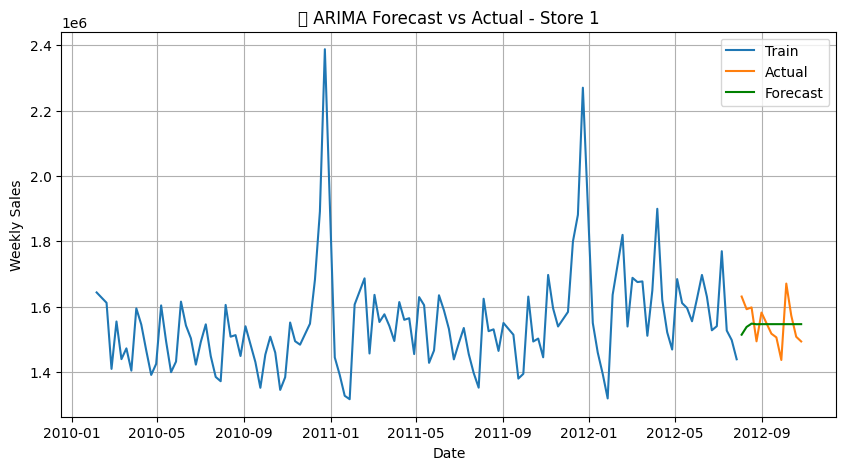

In [418]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index, test['Weekly_Sales'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.title("📈 ARIMA Forecast vs Actual - Store 1")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()


In [419]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Actual values
y_true_arima = test['Weekly_Sales']

# Predicted values
y_pred_arima = forecast

# RMSE calculation
rmse_arima = np.sqrt(mean_squared_error(y_true_arima, y_pred_arima))
print(f" ARIMA RMSE: {rmse_arima:,.2f}")


 ARIMA RMSE: 69,487.43


#SARIMA

In [420]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [421]:
df_store1 = df[df['Store'] == 1].copy()
df_store1 = df_store1[['Date', 'Weekly_Sales']].set_index('Date')
df_store1.index = pd.to_datetime(df_store1.index)

In [422]:
train = df_store1.iloc[:-12]
test = df_store1.iloc[-12:]

In [423]:
model = SARIMAX(train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 52),  # 52 = weekly seasonality (52 weeks/year)
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

In [424]:
forecast = results.get_forecast(steps=12)
y_pred = forecast.predicted_mean
y_true = test


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


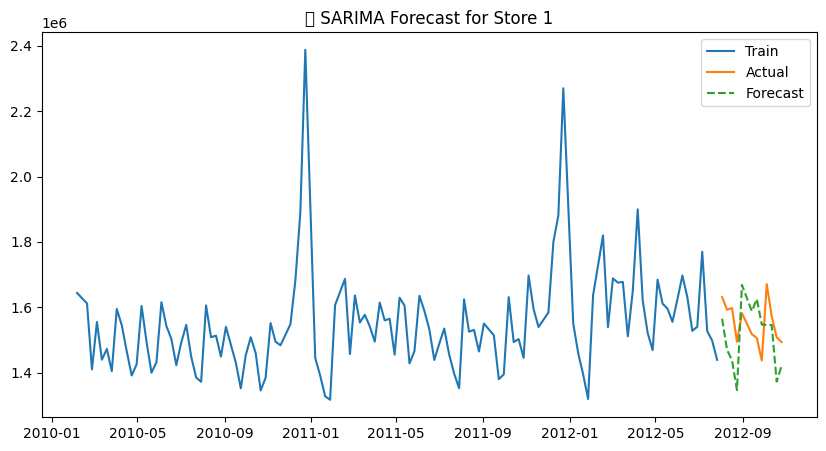

In [425]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, y_true, label='Actual')
plt.plot(test.index, y_pred, label='Forecast', linestyle='--')
plt.title("📈 SARIMA Forecast for Store 1")
plt.legend()
plt.show()

In [426]:
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f" SARIMA RMSE: {rmse:,.2f}")

 SARIMA RMSE: 110,104.51


✅ Final Conclusion

For Store 1 (individual store level):

ARIMA performed best with the lowest RMSE (69,487.43)

It captured short-term trends better for this specific store

For multiple stores or a large-scale retail dataset:

Prophet is more suitable because:


It handles weekly seasonality, holiday effects, and missing dates automatically

Easy to apply the same model across many stores (scalable)

More robust when working with irregular time series or complex patterns

📌 Final Takeaway

✅ Use ARIMA for small, clean datasets like one store

✅ Use Prophet for large-scale forecasting across multiple stores